In [323]:
import pandas as pd
import numpy as np
import ppscore as pps
import seaborn as sns
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings('ignore')

In [324]:
df = pd.read_csv('data.csv')
df = df[df["Y"].between(df.Y.quantile(.05),df.Y.quantile(.95))]
y = pd.DataFrame(df['Y'])
X = df.drop('Y', axis = 1)
bins = np.linspace(y.min()[0],y.max()[0],20)
df = df.reset_index(drop = True)
y = pd.DataFrame(np.digitize(y, bins = bins))
df['Y'] = y

<AxesSubplot:>

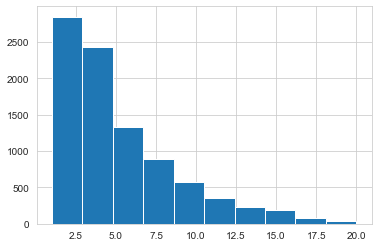

In [325]:
df.Y.hist()

In [326]:
df.Y.value_counts()

2     1574
3     1327
1     1275
4     1111
5      763
6      575
7      495
8      400
9      320
10     257
11     187
12     167
13     117
14     117
16     103
15      88
19      42
17      41
18      40
20       1
Name: Y, dtype: int64

In [327]:
desc = pd.read_excel('data_description.xlsx')
desc_1 = desc[(~(desc.OPIS.str.contains('3')) & (~(desc.OPIS.str.contains('6'))))]
desc_3 = desc[desc.OPIS.str.contains('3')]
desc_3 = pd.concat([desc.iloc[:2], desc_3])
desc_6 = desc[desc.OPIS.str.contains('6')]
desc_6 = pd.concat([desc.iloc[:2], desc_6])
if len(desc_1)+len(desc_3)-2+len(desc_6)-2 == len(desc):
    print('all done')

all done


In [328]:
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2, k=len(X.columns)).fit((X).astype(int), y) #(10*X_train).astype(int)
feature_scoring = dict(zip(list(X.columns),list(selector.scores_)))

In [329]:
feature_scoring

{'X1': 1006.2720684820845,
 'X2': 308989.18353923806,
 'X3': 769011.7273499232,
 'X4': 1490020.6390348482,
 'X5': 256350.9307547781,
 'X6': 94.84817562308422,
 'X7': 270.0149215672048,
 'X8': 545.4833160601581,
 'X9': 16142.057820336602,
 'X10': 50630.514340601105,
 'X11': 89029.61616139584,
 'X12': 16881.065273979846,
 'X13': 67.35627588544627,
 'X14': 198.1862401340277,
 'X15': 333.15815502450033,
 'X16': 1679409.1980835362,
 'X17': 3723511.2695126436,
 'X18': 5690748.465229634,
 'X19': 1239931.3142473772,
 'X20': 426.8907386841543,
 'X21': 1055.2876485542024,
 'X22': 1827.4183931057642,
 'X23': 32939068.54663476,
 'X24': 94407442.95568568,
 'X25': 204339828.63663605,
 'X26': 31325386.966525223,
 'X27': 7013.158251110584,
 'X28': 18402.257065648202,
 'X29': 31093.54376693171,
 'X30': 4024528.580833346,
 'X31': 3435885.310705558,
 'X32': 7655545.008223157,
 'X33': 1145728.8756632733,
 'X34': 138.56365093550582,
 'X35': 326.2344748915528,
 'X36': 507.02364873006366,
 'X37': 144580.8369

In [330]:
score_value = []
feature_name = []
for i in range(1,len(list(selector.scores_))-2,3):
    score_value.append(max(list(selector.scores_)[i], list(selector.scores_)[i+1],list(selector.scores_)[i+2]))
    feature_name.append(list(X.columns)[list(selector.scores_).index(score_value[-1])])
best_feature_dict = dict(zip(feature_name, score_value))
bdf = df[df.columns.intersection(feature_name)]
bdf[['Y','X1']] = df[['Y','X1']]
bdf = bdf.reindex(sorted(bdf.columns), axis=1)
y = pd.DataFrame(bdf['Y'])
X = bdf.drop('Y', axis = 1)

pierwszy zakres to X2:X4, drugi X5:X7 itd

In [331]:
bdf

,X1,X10,X100,X102,X106,X109,X11,X110,X115,X116,...,X73,X74,X79,X81,X85,X88,X89,X94,X95,Y
0,27,331.3,0.0,0.0,0,0.0,388.4,0.0,0.0,0.0,...,0.0,0.0,4.5,13.0,2,15.8,5.2,0.0,0.0,1
1,27,156.5,0.0,0.0,0,0.0,360.6,0.0,0.0,0.0,...,208.7,336.7,180.9,709.7,27,277.0,47.4,0.0,0.0,6
2,33,377.8,0.0,0.0,0,0.0,513.9,0.0,0.0,0.0,...,249.0,668.0,98.4,235.0,6,0.0,0.0,0.0,0.0,11
3,34,405.0,0.0,0.0,0,0.0,417.9,0.0,0.0,0.0,...,0.0,0.0,21.9,422.6,28,1278.5,298.2,0.0,0.0,4
4,39,32.5,28.9,28.9,1,0.0,70.0,0.0,0.0,0.0,...,0.0,0.0,0.0,129.6,6,301.2,72.6,0.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,35,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,1
8996,33,0.0,18.0,18.0,1,50.0,0.0,16.7,0.0,0.0,...,0.0,0.0,42.1,648.1,12,212.8,70.9,0.0,0.0,6
8997,23,147.0,24.0,41.1,3,0.0,147.0,0.0,1.7,1.7,...,0.0,0.0,34.0,112.7,6,634.4,208.3,0.0,0.0,2
8998,39,79.6,0.0,28.9,1,548.6,521.6,166.7,4.4,8.8,...,129.0,129.0,42.1,452.7,17,368.9,50.5,0.0,0.0,18


delete comments, add k = .. for redu

In [332]:
"""chi_best_k = SelectKBest(chi2, k=50).fit((10*X).astype(int), y) #(10*X_train).astype(int)

chi_best_feats = []
for i in range(len(list(chi_best_k.get_support()))):
    if list(chi_best_k.get_support())[i] == True:
        chi_best_feats.append(list(X.columns)[i])

bdf = df[df.columns.intersection(chi_best_feats)]
bdf[['Y','X1']] = df[['Y','X1']]
bdf = bdf.reindex(sorted(bdf.columns), axis=1)"""

"chi_best_k = SelectKBest(chi2, k=50).fit((10*X).astype(int), y) #(10*X_train).astype(int)\n\nchi_best_feats = []\nfor i in range(len(list(chi_best_k.get_support()))):\n    if list(chi_best_k.get_support())[i] == True:\n        chi_best_feats.append(list(X.columns)[i])\n\nbdf = df[df.columns.intersection(chi_best_feats)]\nbdf[['Y','X1']] = df[['Y','X1']]\nbdf = bdf.reindex(sorted(bdf.columns), axis=1)"

In [333]:
bdf

,X1,X10,X100,X102,X106,X109,X11,X110,X115,X116,...,X73,X74,X79,X81,X85,X88,X89,X94,X95,Y
0,27,331.3,0.0,0.0,0,0.0,388.4,0.0,0.0,0.0,...,0.0,0.0,4.5,13.0,2,15.8,5.2,0.0,0.0,1
1,27,156.5,0.0,0.0,0,0.0,360.6,0.0,0.0,0.0,...,208.7,336.7,180.9,709.7,27,277.0,47.4,0.0,0.0,6
2,33,377.8,0.0,0.0,0,0.0,513.9,0.0,0.0,0.0,...,249.0,668.0,98.4,235.0,6,0.0,0.0,0.0,0.0,11
3,34,405.0,0.0,0.0,0,0.0,417.9,0.0,0.0,0.0,...,0.0,0.0,21.9,422.6,28,1278.5,298.2,0.0,0.0,4
4,39,32.5,28.9,28.9,1,0.0,70.0,0.0,0.0,0.0,...,0.0,0.0,0.0,129.6,6,301.2,72.6,0.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,35,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,1
8996,33,0.0,18.0,18.0,1,50.0,0.0,16.7,0.0,0.0,...,0.0,0.0,42.1,648.1,12,212.8,70.9,0.0,0.0,6
8997,23,147.0,24.0,41.1,3,0.0,147.0,0.0,1.7,1.7,...,0.0,0.0,34.0,112.7,6,634.4,208.3,0.0,0.0,2
8998,39,79.6,0.0,28.9,1,548.6,521.6,166.7,4.4,8.8,...,129.0,129.0,42.1,452.7,17,368.9,50.5,0.0,0.0,18


In [334]:
from sklearn.metrics import mean_squared_error

In [335]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(bdf, train_size = 0.9)#, stratify = bdf['Y'])
X_train = df_train.drop('Y', axis = 1)
y_train = df_train.Y
X_test = df_test.drop('Y', axis = 1)
y_test = df_test.Y

In [336]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train, y_train)
mse = mean_squared_error(y_test, lr.predict(X_test))
print(type(lr))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
print(f'train: {lr.score(X_train, y_train)}')
print(f'test: {lr.score(X_test, y_test)}')

<class 'sklearn.linear_model._base.LinearRegression'>
The mean squared error (MSE) on test set: 11.4045
train: 0.3015925294361177
test: 0.24139966607255636


In [337]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100, random_state = 0).fit(X_train, y_train)
mse = mean_squared_error(y_test, forest.predict(X_test))
print(type(forest))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
print(f'train: {forest.score(X_train, y_train)}')
print(f'test: {forest.score(X_test, y_test)}')

<class 'sklearn.ensemble._forest.RandomForestClassifier'>
The mean squared error (MSE) on test set: 12.3600
train: 0.9839506172839506
test: 0.4255555555555556


In [338]:
from sklearn import ensemble
reg = ensemble.GradientBoostingRegressor()
reg.fit(X_train, y_train)
mse = mean_squared_error(y_test, reg.predict(X_test))
print(type(reg))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
print(f'train: {reg.score(X_train, y_train)}')
print(f'train: {reg.score(X_test, y_test)}')

<class 'sklearn.ensemble._gb.GradientBoostingRegressor'>
The mean squared error (MSE) on test set: 8.9748
train: 0.5195567181056677
train: 0.4030124892463648


In [339]:
from sklearn.ensemble import GradientBoostingClassifier
gbrt = GradientBoostingClassifier(random_state=0).fit(X_train, y_train)
mse = mean_squared_error(y_test, gbrt.predict(X_test))
print(type(gbrt))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
print(f'train: {gbrt.score(X_train, y_train)}')
print(f'train: {gbrt.score(X_test, y_test)}')

<class 'sklearn.ensemble._gb.GradientBoostingClassifier'>
The mean squared error (MSE) on test set: 14.3100
train: 0.6650617283950617
train: 0.3688888888888889


In [347]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=0,activation = 'relu',hidden_layer_sizes=[10, 10]).fit(X_train, y_train)

In [348]:
mlp.score(X_train,y_train)

0.17358024691358026